<a href="https://colab.research.google.com/github/rajan2012/MachineLearning/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Assuming the file is named "your_file.csv" and is located in the current directory
file_path = "product_recommend.csv"

# Read the CSV file into a DataFrame   ,nrows=10
df2 = pd.read_csv(file_path.strip())

#df = pd.read_csv(file_path, sep='\t', compression='gzip')



In [ ]:
df=df2

In [ ]:

# Apply Label Encoding to each categorical column
df['Gender'] = df['Gender'].str.lower()
df['Product_Category'] = df['Product_Category'].str.lower()
df['Product_Description'] = df['Product_Description'].str.lower()
#df['Label'] = label_encoder.fit_transform(df['Label'])
df['Product_ID'] = df['Product_ID'].str.lower()


In [ ]:
df['Gender'].unique()

array(['female', 'male', 'non-binary'], dtype=object)

In [ ]:
len(df)

86

In [ ]:
df.drop('Label',axis=1,inplace=True)

In [ ]:
df.head(1)

,idx,Age,Gender,Previous_Purchases,Product_ID,Product_Category,Price,Product_Description,Label
0,0,28,female,5,p12345,beauty,39.99,organic skin care set,Relevant


In [ ]:
#no of null value count for each val
# Assuming df is your DataFrame
null_counts = df.isnull().sum()
print(null_counts)

idx                    0
Age                    0
Gender                 0
Previous_Purchases     0
Product_ID             0
Product_Category       0
Price                  0
Product_Description    0
dtype: int64


In [ ]:
# Remove all non-numeric characters from the Product_ID column
#df['Product_ID_1'] = df['Product_ID'].str.replace(r'\D', '', regex=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Product_Category'] = label_encoder.fit_transform(df['Product_Category'])
df['Product_Description'] = label_encoder.fit_transform(df['Product_Description'])
#df['Label'] = label_encoder.fit_transform(df['Label'])
df['Product_ID'] = label_encoder.fit_transform(df['Product_ID'])


In [ ]:
#df['Product_Description'] = label_encoder.fit_transform(df['Product_Description'])

In [ ]:
df['Product_Description'].unique()

array([34, 58, 45, 27, 14, 18, 15, 46, 53, 43, 22, 32, 30, 33, 26,  4, 25,
       38, 12, 39, 56, 10, 54,  0, 17, 55, 48, 20,  3, 24, 47, 40, 21, 35,
       16, 23,  2,  9, 29, 28,  5, 41, 42, 50, 11, 49, 36, 13, 57,  1, 19,
        6, 37,  7, 31, 51, 44, 52,  8])

#clustering

#Customer Segmentation

In [ ]:
df['Gender'].unique()

array([0, 1, 2])

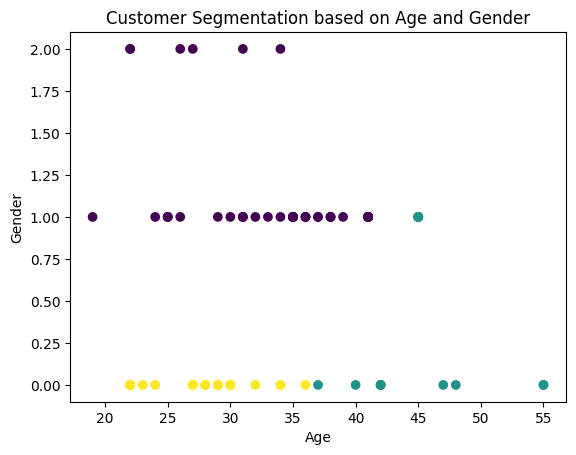

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Step 3: Normalize the features (optional but recommended for K-means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Gender']])

# Step 4: Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choosing 2 clusters for simplicity
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Visualize the clusters (optional)
plt.scatter(df['Age'], df['Gender'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.title('Customer Segmentation based on Age and Gender')
plt.show()

#behaviour clustering

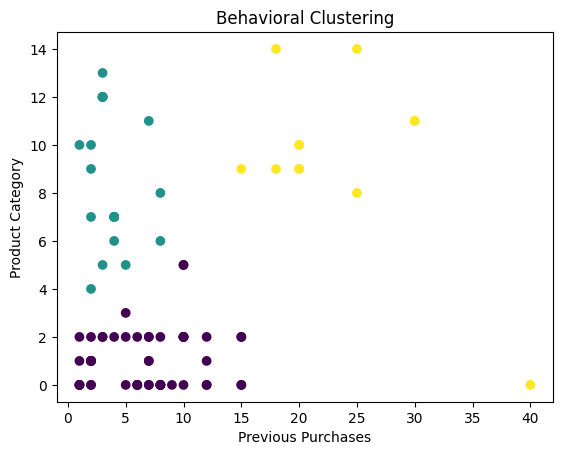

In [ ]:
# Step 2: Normalize the features (Previous_Purchases, Product_Category, and Product_ID)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Previous_Purchases', 'Product_Category', 'Product_ID']])

# Step 3: Apply K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 4: Check the cluster distribution
#print(df[['Customer_ID', 'Cluster']])

# Step 5: Visualize the clusters (Optional)
plt.scatter(df['Previous_Purchases'], df['Product_Category'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Previous Purchases')
plt.ylabel('Product Category')
plt.title('Behavioral Clustering')
plt.show()

#dbscan

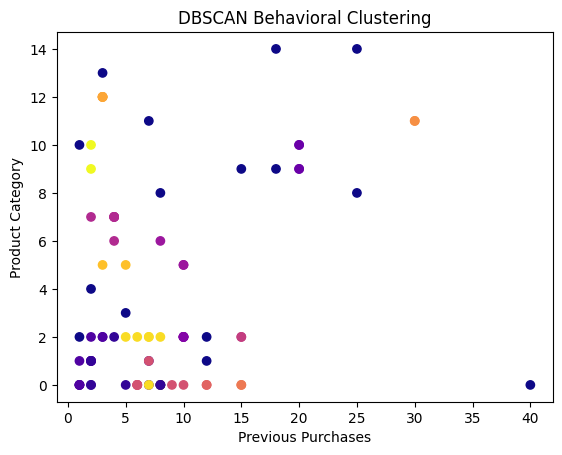

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)
df['Cluster_DBSCAN'] = dbscan.fit_predict(scaled_features)

# Visualize DBSCAN results
plt.scatter(df['Previous_Purchases'], df['Product_Category'], c=df['Cluster_DBSCAN'], cmap='plasma')
plt.xlabel('Previous Purchases')
plt.ylabel('Product Category')
plt.title('DBSCAN Behavioral Clustering')
plt.show()

#Price Sensitivity Clustering

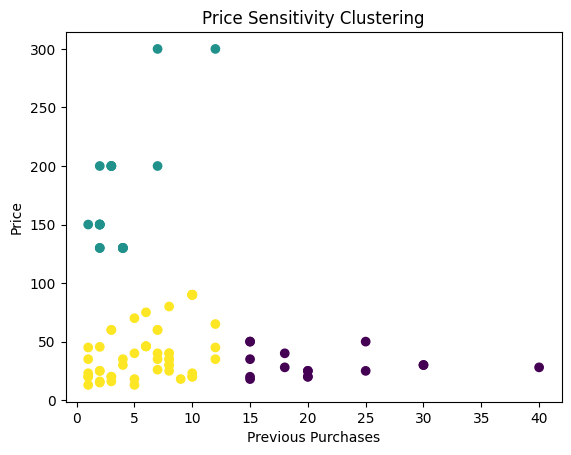

In [ ]:
# Step 1: Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Price', 'Previous_Purchases']])

# Step 2: Apply K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 3: Visualize the clusters (Optional)
plt.scatter(df['Previous_Purchases'], df['Price'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Previous Purchases')
plt.ylabel('Price')
plt.title('Price Sensitivity Clustering')
plt.show()

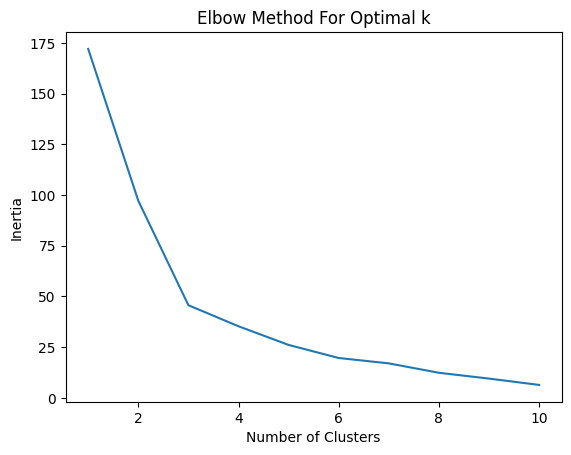

In [ ]:
# Finding the optimal number of clusters using Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the inertia values
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


#Product Category Clustering

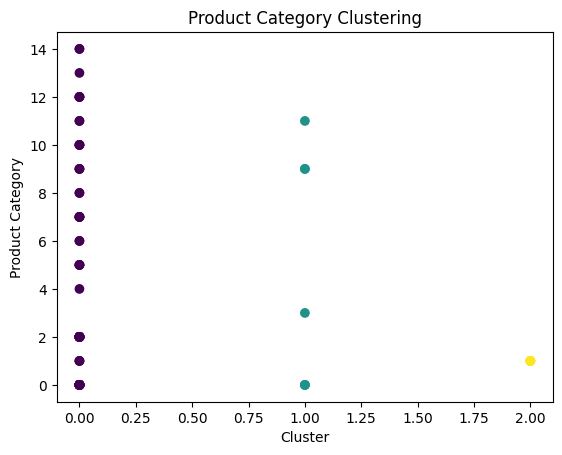

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Step 1: Convert Product Description to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Product_Description'])

# Step 2: K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
df['Cluster'] = kmeans.fit_predict(X)

# Step 4: Plot the clusters (Optional, for visualization if 2D or 3D features)
plt.scatter(df['Cluster'], df['Product_Category'], c=df['Cluster'])
plt.xlabel('Cluster')
plt.ylabel('Product Category')
plt.title('Product Category Clustering')
plt.show()

In [ ]:
df.head(1)

,idx,Age,Gender,Previous_Purchases,Product_ID,Product_Category,Price,Product_Description,Label
0,0,28,0,5,3,0,39.99,organic skin care set,Relevant


#Demographic and Purchase Behavior

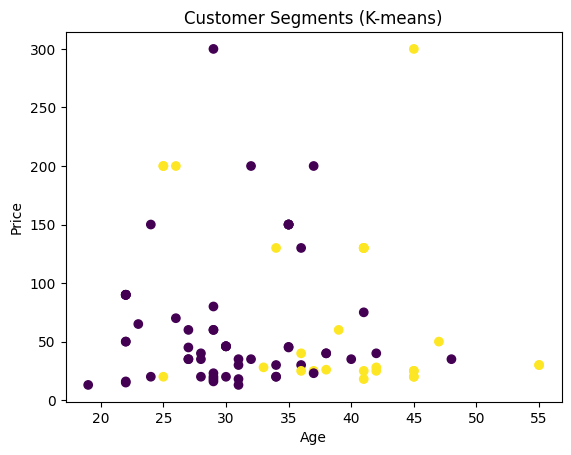

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


# Step 1: Feature scaling
scaler = StandardScaler()
df_scaled = df[['Age', 'Gender', 'Previous_Purchases', 'Product_Category', 'Price']]
df_scaled = scaler.fit_transform(df_scaled)

# Step 2: Clustering using K-means
# Choose number of clusters (for example, 2)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Step 3: Clustering using Gaussian Mixture Models (Optional)
gmm = GaussianMixture(n_components=2, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(df_scaled)

# Plot the clusters (2D plot for illustration, you may use PCA for more dimensions)
plt.scatter(df['Age'], df['Price'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments (K-means)')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

#Product Affinity Clustering

In [ ]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps and min_samples are the parameters for DBSCAN
df['Cluster'] = dbscan.fit_predict(df[['Product_ID']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,idx,Age,Gender,Previous_Purchases,Product_ID,Product_Category,Price,Product_Description,Label,Cluster,Cluster_GMM
0,0,28,0,5,3,0,39.99,organic skin care set,Relevant,-1,0


In [ ]:
product_cluster = df[df['Product_ID'] == 3]['Cluster'].values[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
product_cluster

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-1

In [ ]:
# Get other products in the same cluster
recommended_products = df[df['Cluster'] == product_cluster]['Product_ID'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
recommended_products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 3, 12,  1, 11, 25,  9,  2, 21,  5,  7, 20,  0, 18,  6, 10, 14, 16,
       15, 22])

In [ ]:
# Remove the input product from the recommendations
recommended_products = recommended_products[recommended_products != 3]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
recommended_products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([12,  1, 11, 25,  9,  2, 21,  5,  7, 20,  0, 18,  6, 10, 14, 16, 15,
       22])

In [ ]:
def recommend_products(product_id, df_encoded):
    # Find the cluster of the given product
    product_cluster = df_encoded[df_encoded['Product_ID'] == product_id]['Cluster'].values[0]

    # Get other products in the same cluster
    recommended_products = df_encoded[df_encoded['Cluster'] == product_cluster]['Product_ID'].unique()

    # Remove the input product from the recommendations
    recommended_products = recommended_products[recommended_products != product_id]

    # Get the Product_Description for the recommended products
    recommended_descriptions = df_encoded[df_encoded['Product_ID'].isin(recommended_products)][['Product_ID', 'Product_Description']]

    return recommended_descriptions

# Example usage: Recommend products similar to 'P12345'
recommended_products = recommend_products(3, df)
#print(recommended_products)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df[df['Product_ID']==3]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,idx,Age,Gender,Previous_Purchases,Product_ID,Product_Category,Price,Product_Description,Label,Cluster,Cluster_GMM
0,0,28,0,5,3,0,39.99,organic skin care set,Relevant,-1,0
56,62,38,1,8,3,0,39.99,organic skin care set,Relevant,-1,0
58,64,38,1,8,3,0,39.99,organic skin care set,Relevant,-1,0


In [ ]:
recommended_products.drop_duplicates(subset=['Product_ID', 'Product_Description'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Product_ID,Product_Description
17,12,volumizing shampoo with nutrients
24,12,organic bedroom scents
26,1,natural lip gloss with honey
32,11,men's hair gel with skin protection
33,25,eco-friendly face cleanser
34,11,men's hair coloring kit
35,9,retinol night cream for anti-aging
42,2,handcrafted lipsticks
44,21,anti-frizz shampoo and conditioner set
45,5,lavender scented body wash


In [ ]:
df['Cluster'].unique()

array([2, 0, 1], dtype=int32)

#recommendation

In [ ]:
df.drop_duplicates(subset=['Age','Gender','Previous_Purchases','Product_ID','Product_Category','Product_Description'])

,idx,Age,Gender,Previous_Purchases,Product_ID,Product_Category,Price,Product_Description,Cluster
0,0,28,0,5,3,0,39.99,organic skin care set,2
1,1,35,1,2,17,1,149.99,wireless headphones,0
5,5,45,1,20,17,9,19.99,stylish beard oil,1
6,6,35,1,2,17,4,45.50,men's hair grooming kit,0
8,8,45,1,20,17,10,24.99,intensive cleanser with vitamin c,1
...,...,...,...,...,...,...,...,...,...
81,89,38,1,7,15,11,25.99,oil-free face wash for sensitive skin,0
82,96,41,1,6,22,2,75.00,vintage wool coat,0
83,97,28,0,4,0,2,34.99,statement sunglasses,2
84,98,42,0,7,25,0,39.99,volumizing mascara for long lashes,1


In [ ]:
# Prepare the data for clustering
df_scaled = df[['Age', 'Gender', 'Previous_Purchases', 'Price','Product_Category']]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Example: 3 clusters
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Assign 'User_ID' based on the cluster label
df['User_ID'] = df['Cluster']  # Now each row has a unique user ID based on clustering

# Drop the 'Cluster' column if not needed
df = df.drop(columns=['Cluster'])

In [ ]:
#df['User_ID'] = df.groupby(['Age', 'Gender']).ngroup() + 1

In [ ]:
df.head(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,idx,Age,Gender,Previous_Purchases,Product_ID,Product_Category,Price,Product_Description,Label,Cluster_GMM,User_ID
0,0,28,0,5,3,0,39.99,organic skin care set,Relevant,0,0


In [ ]:
df['User_ID'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 2, 1], dtype=int32)

In [ ]:
# Create user-product matrix using pivot
user_product_matrix = df.pivot_table(index='User_ID', columns='Product_ID', aggfunc='size', fill_value=0)

In [ ]:
len(df['Product_ID'].unique())

26

In [ ]:
user_product_matrix

Product_ID,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
User_ID,,,,,,,,,,,,,,,,,,,,,
0,1,2,1,3,7,1,0,0,2,0,...,1,1,1,5,1,2,1,2,4,3
1,0,0,0,0,0,0,1,1,0,2,...,0,7,0,1,0,0,0,0,2,1
2,2,1,0,0,0,0,0,0,5,0,...,0,6,0,0,0,0,0,4,0,0


In [ ]:
# Sample Python Code
# Group products based on demographics
grouped_data = df.groupby(['Age', 'Gender', 'Product_Category']).Product_ID.apply(list)

# Example of a Collaborative Filtering using a simple popularity-based model
from sklearn.metrics.pairwise import cosine_similarity

# Assuming a user-product matrix is created
similarity_matrix = cosine_similarity(user_product_matrix)


In [ ]:
similarity_matrix.dtype

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dtype('float64')

In [ ]:
import pandas as pd

# Assuming user_product_matrix is indexed by User_ID
user_ids = user_product_matrix.index

# Create a DataFrame from the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=user_ids, columns=user_ids)


In [ ]:
similarity_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


User_ID,0,1,2
User_ID,,,
0,1.000000,0.249769,0.276192
1,0.249769,1.000000,0.580818
2,0.276192,0.580818,1.000000


In [ ]:
import numpy as np
# Index of the user you want to find similarities for
user_index = 0  # This corresponds to User 1 in zero-based indexing

# Retrieve similarity scores for User 1 and exclude the self-similarity score
user_similarity_scores = similarity_matrix[user_index]
user_similarity_scores[user_index] = -1  # Temporarily set self-similarity to -1 to ignore it

# Find the index of the most similar user
most_similar_user_index = np.argmax(user_similarity_scores)

In [ ]:
most_similar_user_index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2

In [ ]:
# Select the similarity scores for User 1
user_1_similarity = similarity_df.loc[1]

# Find the user with the highest similarity to User 1, excluding User 1 itself
most_similar_user = user_1_similarity.drop(index=1).idxmax()

In [ ]:
most_similar_user

22

#recommend products based on  collaborative filtering rule

#product matrix

In [ ]:
df.head(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,idx,Age,Gender,Previous_Purchases,Product_ID,Product_Category,Price,Product_Description,Label,Cluster_GMM,User_ID
0,0,28,0,5,3,0,39.99,organic skin care set,Relevant,0,0


In [ ]:
product=df[['Product_ID','Product_Category','Price','Product_Description']]

In [ ]:
product.head(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Product_ID,Product_Category,Price,Product_Description
0,3,0,39.99,organic skin care set


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack


product_0_to_25=product[product['Product_ID'].isin(range(26))].drop_duplicates(subset=['Product_ID'])

# Step 2: Standardize Price
scaler = StandardScaler()
price_scaled = scaler.fit_transform(product_0_to_25[['Price']])


# Step 3: Vectorize Product_Description using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
product_description_tfidf = vectorizer.fit_transform(product_0_to_25['Product_Description'])

Product_Category=pd.get_dummies(product_0_to_25['Product_Category'])

# Step 4: Combine all features into a single feature matrix
combined_features = hstack([price_scaled, Product_Category, product_description_tfidf])

# Step 5: Compute cosine similarity for the combined feature matrix
product_similarity_matrix = cosine_similarity(combined_features)

In [ ]:
len(product_0_to_25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


26

In [ ]:
# Step 6: Create a DataFrame with Product_ID as index and similarity matrix as values
product_similarity_df = pd.DataFrame(product_similarity_matrix, index=product['Product_ID'], columns=product['Product_ID'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
product_similarity_matrix.shape

(26, 26)

In [ ]:
product_similarity_matrix

array([[ 1.00000000e+00, -1.64148200e-01, -6.75870261e-02,
         1.00428173e-01, -1.40678257e-01,  5.41102009e-01,
         6.77015441e-01,  6.13885155e-01,  5.41046016e-01,
         7.99105349e-02, -1.98362681e-01,  7.15882444e-03,
         5.33771314e-01,  1.95957581e-01,  1.13379305e-01,
        -4.38302196e-02,  7.15882444e-03,  6.88085405e-02,
        -2.22845929e-01, -5.77312365e-03,  1.04248561e-01,
         7.99105349e-02,  5.40486255e-01,  5.41190037e-01,
         1.60029194e-01, -3.14001825e-02],
       [-1.64148200e-01,  1.00000000e+00,  1.93956829e-01,
        -2.88202204e-01,  4.03709266e-01, -3.15094119e-01,
        -1.22504652e-01, -1.97462251e-01, -2.88424170e-01,
        -2.29322029e-01,  5.69248253e-01, -2.05439264e-02,
        -1.97462251e-01, -2.99165705e-01, -3.25368516e-01,
         1.25781099e-01, -2.05439264e-02, -1.97462251e-01,
         7.71530542e-01,  1.65673328e-02, -2.99165705e-01,
        -2.29322029e-01, -2.71242799e-01, -2.99165705e-01,
        -2.53

In [ ]:
df['User_ID'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 2, 1], dtype=int32)

In [ ]:
user_product_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product_ID,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
User_ID,,,,,,,,,,,,,,,,,,,,,
0,1,2,1,3,7,1,0,0,2,0,...,1,1,1,5,1,2,1,2,4,3
1,0,0,0,0,0,0,1,1,0,2,...,0,7,0,1,0,0,0,0,2,1
2,2,1,0,0,0,0,0,0,5,0,...,0,6,0,0,0,0,0,4,0,0


In [ ]:
product_similarity_matrix.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(26, 26)

In [ ]:
user_product_matrix.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3, 26)

In [ ]:
import pandas as pd

# Step 2: Function to recommend products based on product similarity
def recommend_products(user_id, df, product_similarity_df, top_n=5):
    # Get products the user has interacted with
    user_interactions = df.loc[user_id]

    # Filter out interactions with value 0, but reindex to ensure shape is 26
    user_interactions = user_interactions[user_interactions > 0].reindex(df.columns, fill_value=0)

    # Score for each product based on similarity to user's interacted products
    scores = product_similarity_df[user_interactions.index].dot(user_interactions)

    # Convert scores into a pandas Series to have an index for sorting
    scores = pd.Series(scores, index=df.columns)

    # Sort the scores in descending order
    sorted_scores = scores.sort_values(ascending=False)

    # Exclude products the user has already interacted with
    recommended_products = sorted_scores[~sorted_scores.index.isin(user_interactions.index)].head(top_n)

    return recommended_products.index.tolist()

# Example usage: recommend products for user 'User_0'
recommendations = recommend_products(2, user_product_matrix, product_similarity_matrix)
print("Recommended products:", recommendations)


Recommended products: []


In [ ]:
product_similarity_matrix.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(26, 26)

#also consider user similarity when recommend product

In [ ]:
import pandas as pd

# Function to calculate user similarity (e.g., cosine similarity between users)
def calculate_user_similarity(df):
    # Compute similarity between users based on product interactions
    # This can be adjusted to other similarity metrics such as Pearson or Cosine
    user_similarity = df.T.corr()  # Transpose the df to calculate similarity between users
    return user_similarity

# Step 2: Function to recommend products based on product similarity and similar users
def recommend_products(user_id, df, product_similarity_df, top_n=5):
    # Get products the user has interacted with
    user_interactions = df.loc[user_id]

    # Filter out interactions with value 0, but reindex to ensure shape is consistent
    user_interactions = user_interactions[user_interactions > 0].reindex(df.columns, fill_value=0)

    # Calculate user similarities
    user_similarity = calculate_user_similarity(df)

    # Get the most similar users to the current user (excluding the user itself)
    similar_users = user_similarity[user_id].drop(user_id).sort_values(ascending=False)
    top_similar_users = similar_users.head(top_n)  # Get top N most similar users

    # Aggregate interactions of the most similar users
    similar_user_interactions = df.loc[top_similar_users.index]

    # Score for each product based on similarity to the interacted products of similar users
    scores = product_similarity_df[user_interactions.index].dot(similar_user_interactions.T).sum(axis=1)

    # Convert scores into a pandas Series to have an index for sorting
    scores = pd.Series(scores, index=df.columns)

    # Sort the scores in descending order
    sorted_scores = scores.sort_values(ascending=False)

    user_interactions = user_interactions[user_interactions != 0]

    # Exclude products the user has already interacted with
    recommended_products = sorted_scores[~sorted_scores.index.isin(user_interactions.index)].head(top_n)

    return recommended_products.index.tolist()

# Example usage: recommend products for user 'User_1'
recommendations = recommend_products(1, user_product_matrix, product_similarity_matrix)
print("Recommended products:", recommendations)


Recommended products: [8, 23, 0, 5, 22]


In [ ]:
df2["Product_ID"].unique()

array([ 3, 17,  4, 12,  8,  1, 19, 11, 25,  9, 23, 13,  2, 21,  5, 24,  7,
       20,  0, 18,  6, 10, 14, 16, 15, 22])

In [ ]:
df.head(1)

,idx,Age,Gender,Previous_Purchases,Product_ID,Product_Category,Price,Product_Description,User_ID
0,0,28,0,5,3,0,39.99,34,0


In [ ]:
Product_Description=df[df['User_ID']==1][['Product_Description']].unique

AttributeError: 'DataFrame' object has no attribute 'unique'

In [ ]:
df2[df2['Product_ID'].isin(recommendations)][['Product_Description','Product_ID']]

,Product_Description,Product_ID
19,smart home hub,8
20,smart home hub,8
21,smart home hub,8
22,smart home hub,8
23,luxury silk scarf,8
25,luxury silk scarf,8
37,high-performance running shoes,23
38,high-performance running shoes,23
39,running shoes,23
40,high-performance running shoes,23


In [ ]:
user_product_matrix

Product_ID,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
User_ID,,,,,,,,,,,,,,,,,,,,,
0,1,2,1,3,7,1,0,0,2,0,...,1,1,1,5,1,2,1,2,4,3
1,0,0,0,0,0,0,1,1,0,2,...,0,7,0,1,0,0,0,0,2,1
2,2,1,0,0,0,0,0,0,5,0,...,0,6,0,0,0,0,0,4,0,0


In [ ]:
#product_similarity_matrix

In [ ]:
user_interactions = user_product_matrix.loc[1]

    # Filter out interactions with value 0, but reindex to ensure shape is consistent
user_interactions = user_interactions[user_interactions > 0].reindex(user_product_matrix.columns, fill_value=0)

In [ ]:
user_interactions

,1
Product_ID,
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,1.0
7,1.0
8,NaN


In [ ]:
user_interactions = user_product_matrix.loc[1]

In [ ]:
user_interactions = user_interactions[user_interactions > 0].reindex(user_product_matrix.columns, fill_value=0)

In [ ]:
# Convert scores into a pandas Series to have an index for sorting
scores = pd.Series(scores, index=user_product_matrix.columns)

    # Sort the scores in descending order
sorted_scores = scores.sort_values(ascending=False)


    # Exclude products the user has already interacted with
recommended_products = sorted_scores[~sorted_scores.index.isin(user_interactions.index)].head(5)

In [ ]:
recommended_products

,0
Product_ID,
8,15.442140
23,14.749843
0,13.626042
5,12.794561
22,12.584205


In [ ]:
df[df['Product_ID'].isin(recommended_products)]

,idx,Age,Gender,Previous_Purchases,Product_ID,Product_Category,Price,Product_Description,User_ID


In [ ]:

user_interactions=user_interactions[user_interactions!=0]

In [ ]:
user_interactions

,1
Product_ID,
6,1
7,1
9,2
12,1
15,1
17,7
19,1
24,2
25,1


In [ ]:
scores

array([13.62604231, -3.97260476,  3.35933446,  8.95695951, -0.29958572,
       12.79456136, 11.46719475, 12.24209728, 15.44213962,  4.9608271 ,
       -6.3804793 ,  7.13026829, 13.02514911, 10.2516312 ,  4.99603689,
        3.8531879 ,  1.3197902 ,  8.80635636, -7.19876781,  7.76224047,
        4.42456982,  4.60377512, 12.5842049 , 14.74984273,  7.32813386,
        6.08352748])

In [ ]:
top_similar_users

,1
User_ID,
2,0.493908
0,-0.106682


In [ ]:
user_similarity

User_ID,0,1,2
User_ID,,,
0,1.000000,-0.106682,-0.048872
1,-0.106682,1.000000,0.493908
2,-0.048872,0.493908,1.000000


In [ ]:
user_interactions

,1
Product_ID,
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,0


#weighted simialrity

In [ ]:
import pandas as pd

# Function to calculate user similarity (e.g., cosine similarity between users)
def calculate_user_similarity(df):
    # Compute similarity between users based on product interactions
    user_similarity = df.T.corr()  # Transpose the df to calculate similarity between users
    return user_similarity

# Step 2: Function to recommend products based on product similarity and weighted similar users
def recommend_products(user_id, df, product_similarity_df, top_n=5):
    # Get products the user has interacted with
    user_interactions = df.loc[user_id]

    # Filter out interactions with value 0, but reindex to ensure shape is consistent
    user_interactions = user_interactions[user_interactions > 0].reindex(df.columns, fill_value=0)

    # Calculate user similarities
    user_similarity = calculate_user_similarity(df)

    # Get the most similar users to the current user (excluding the user itself)
    similar_users = user_similarity[user_id].drop(user_id).sort_values(ascending=False)

    # Top N most similar users (this can be adjusted)
    top_similar_users = similar_users.head(top_n)

    # Initialize a variable to store weighted scores
    weighted_scores = pd.Series(0, index=df.columns)

    # Calculate weighted scores based on similarity to each similar user
    for similar_user, similarity_score in top_similar_users.items():
        # Get the product interactions of the similar user
        similar_user_interactions = df.loc[similar_user]

        # Score for each product based on similarity to the interacted products of similar user
        # Multiply by the similarity weight for this user
        weighted_scores += product_similarity_df[similar_user_interactions.index].dot(similar_user_interactions) * similarity_score

    # Sort the weighted scores in descending order
    sorted_scores = weighted_scores.sort_values(ascending=False)

    # Exclude products the user has already interacted with
    recommended_products = sorted_scores[~sorted_scores.index.isin(user_interactions.index)].head(top_n)

    return recommended_products.index.tolist()

# Example usage: recommend products for user 'User_1'
recommendations = recommend_products(1, user_product_matrix, product_similarity_matrix)
print("Recommended products:", recommendations)


##recommend products based on  content  rule

In [ ]:
# Step 7: Recommend products for a given product based on similarity
def recommend_products(product_id, product_similarity_matrix, top_n=5):
    # Get the index of the product
    product_idx = product[product['Product_ID'] == product_id].index[0]

    # Get similarity scores for the product with all others
    similarity_scores = product_similarity_matrix[product_idx]

    # Sort the products based on similarity scores in descending order
    similar_products_idx = similarity_scores.argsort()[-top_n-1:-1][::-1]  # Top N similar products

    # Get the product IDs and Product Descriptions of the most similar products
    recommended_products = product.iloc[similar_products_idx][['Product_ID', 'Product_Description']]


    return recommended_products

# Example usage: recommend products similar to 'P12345'
recommended_products = recommend_products(3, product_similarity_matrix)
print("Recommended products:", recommended_products)

Recommended products:     Product_ID                Product_Description
6           17            men's hair grooming kit
7           17                  stylish beard oil
23           8                  luxury silk scarf
5           17                  stylish beard oil
8           17  intensive cleanser with vitamin c


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
product.head(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Product_ID,Product_Category,Price,Product_Description
0,3,0,39.99,organic skin care set
